In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA UNDERSTANDING

In [88]:
df = pd.read_csv("data_transaksi_petshop1.csv")
df

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
0,TX-20241001-001,2024-10-01,Life Cat Pouch - Chicken Tuna Adult,Makanan,8,130000,1040000,Tunai
1,TX-20241006-001,2024-10-06,Trixie Cat Tunnel,Mainan,1,4435,4435,QRIS
2,TX-20240114-001,2024-01-14,Beaphar Ear Cleaner for Dogs & Cats,Obat Hewan,2,4435,8870,Tunai
3,TX-20240311-001,2024-03-11,Life Cat Pouch - Salmon Adult,Makanan,16,250000,4000000,QRIS
4,TX-20240707-001,2024-07-07,Life Cat Pouch - Kitten Chicken,Makanan,6,12024,72144,Transfer
...,...,...,...,...,...,...,...,...
1346,TX-20240614-005,2024-06-14,Frontline Plus Flea & Tick Treatment,Obat Hewan,11,12024,132264,Transfer
1347,TX-20240819-004,2024-08-19,Seresto Flea and Tick Collar for Dogs,Obat Hewan,9,4435,39915,QRIS
1348,TX-20240413-003,2024-04-13,Kong Puppy Teething Stick,Mainan,4,130000,520000,QRIS
1349,TX-20240102-007,2024-01-02,Trixie Cat Scratching Post,Mainan,3,12024,36072,Transfer


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Transaksi       1351 non-null   object
 1   Tanggal Transaksi  1351 non-null   object
 2   Nama Barang        1351 non-null   object
 3   Kategori           1351 non-null   object
 4   Jumlah Terjual     1351 non-null   int64 
 5   Harga Satuan       1351 non-null   int64 
 6   Total Harga        1351 non-null   int64 
 7   Metode Pembayaran  1351 non-null   object
dtypes: int64(3), object(5)
memory usage: 84.6+ KB


In [90]:
df.isnull().sum()

ID Transaksi         0
Tanggal Transaksi    0
Nama Barang          0
Kategori             0
Jumlah Terjual       0
Harga Satuan         0
Total Harga          0
Metode Pembayaran    0
dtype: int64

In [91]:
df.duplicated().sum()

np.int64(0)

In [92]:
df.describe()

,Jumlah Terjual,Harga Satuan,Total Harga
count,1351.000000,1351.000000,1.351000e+03
mean,9.913397,81632.384900,8.002299e+05
std,5.514215,84131.107472,1.057884e+06
min,1.000000,4435.000000,4.435000e+03
25%,5.000000,12024.000000,9.619200e+04
50%,10.000000,50000.000000,4.000000e+05
75%,15.000000,130000.000000,9.500000e+05
max,19.000000,250000.000000,4.750000e+06


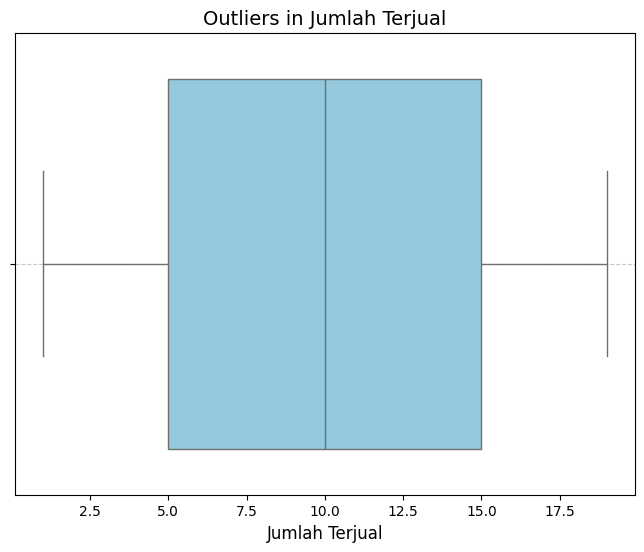

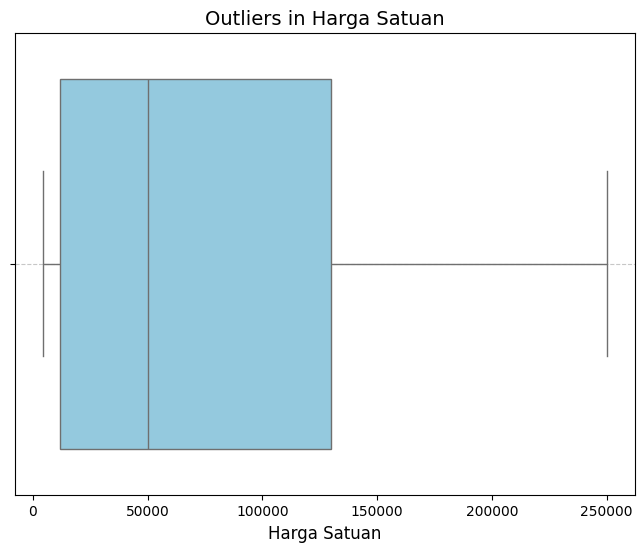

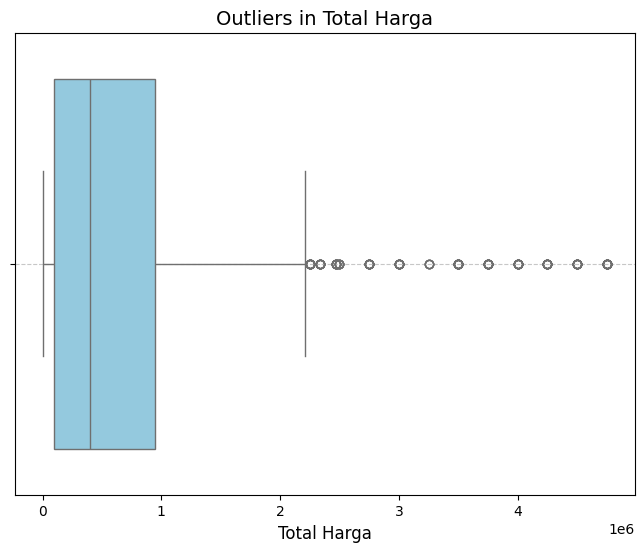

In [93]:
# Mendeteksi outlier menggunakan rentang interkuartil (IQR) untuk kolom numerik
def plot_outliers(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name], color='skyblue')
    plt.title(title, fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_outliers('Jumlah Terjual', 'Outliers in Jumlah Terjual')
plot_outliers('Harga Satuan', 'Outliers in Harga Satuan')
plot_outliers('Total Harga', 'Outliers in Total Harga')


C:\Users\user\AppData\Local\Temp\ipykernel_18544\2988802089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")


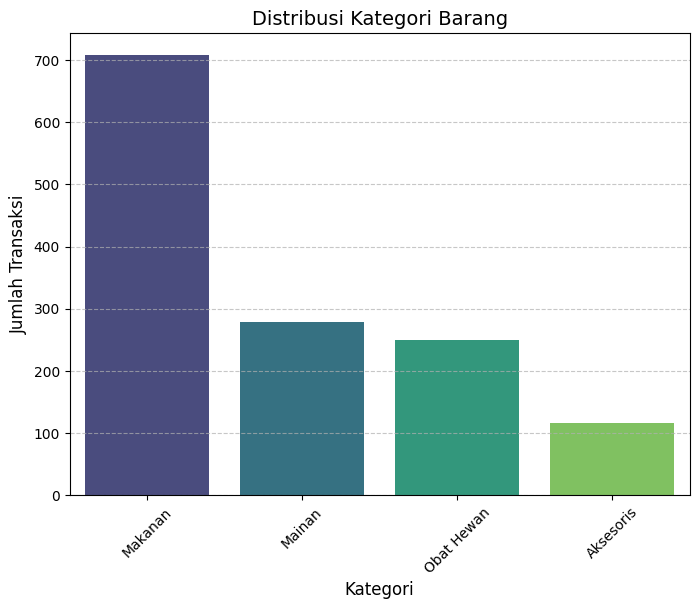

In [94]:
# Menampilkan jumlah transaksi berdasarkan kategori barang
category_distribution = df['Kategori'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")
plt.title("Distribusi Kategori Barang", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18544\539559230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette="viridis")


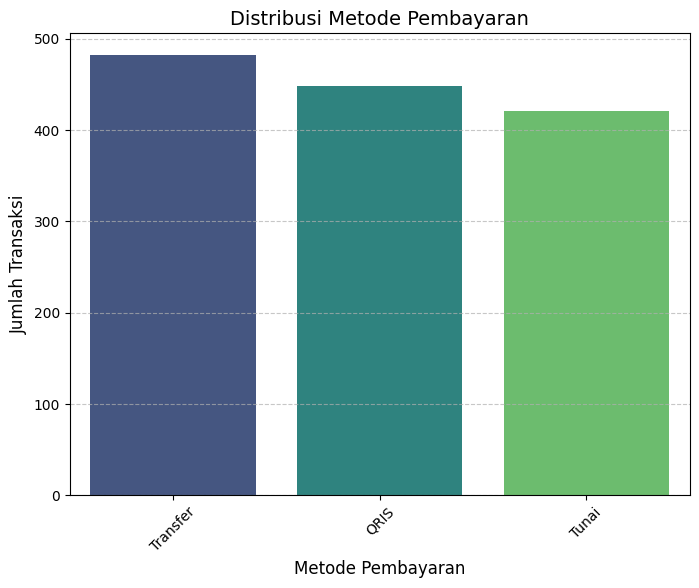

In [95]:
# Memperlihatkan proporsi penggunaan metode pembayaran.
payment_distribution = df['Metode Pembayaran'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette="viridis")
plt.title("Distribusi Metode Pembayaran", fontsize=14)
plt.xlabel("Metode Pembayaran", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [96]:
# Menampilkan transaksi yang terdeteksi sebagai outlier berdasarkan kolom Total Harga
# outliers_total_harga = df

# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Kategori', y='Total Harga', data=outliers_total_harga, palette="coolwarm")
# plt.title("Outliers in Total Harga by Kategori", fontsize=14)
# plt.xlabel("Kategori", fontsize=12)
# plt.ylabel("Total Harga", fontsize=12)
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

DATA PREPARATION

In [97]:
# Validasi konsistensi Total Harga
# df['Calculated Total Harga'] = df['Jumlah Terjual'] * df['Harga Satuan']
# invalid_total_harga = df[df['Total Harga'] != df['Calculated Total Harga']]
# print("Data dengan Total Harga yang tidak valid:\n", invalid_total_harga)

Terdapat 3 cara untuk menangani outlier yaitu menghapus outlier, mengganti outlier, transformasi data.

In [98]:
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)  
    Q3 = df[column_name].quantile(0.75)  
    IQR = Q3 - Q1 
    
    # Batas bawah dan atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter untuk data yang dianggap outlier
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [99]:
# Menghapus data yang merupakan outlier pada kolom 'Total Harga'
outliers_total_harga = detect_outliers(df, 'Total Harga')
df_cleaned = df[~df.index.isin(outliers_total_harga.index)]

print(f"Jumlah data sebelum membersihkan outliers: {len(df)}")
print(f"Jumlah data setelah membersihkan outliers: {len(df_cleaned)}")


Jumlah data sebelum membersihkan outliers: 1351
Jumlah data setelah membersihkan outliers: 1213


In [100]:
# Mengganti Outlier
# Cocok jika outlier adalah valid tetapi terlalu ekstrem. Anda bisa mengganti nilai outlier dengan nilai tertentu (misalnya, batas atas atau rata-rata).

# # Mengganti outlier dengan batas bawah/atas
# df['Total Harga'] = df['Total Harga'].apply(
#     lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
# )

# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df['Total Harga'], color='lightgreen')
# plt.title("Total Harga After Handling Outliers", fontsize=14)
# plt.xlabel("Total Harga", fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [101]:
# Transformasi Data
# Cocok jika distribusi data sangat miring karena outlier. Gunakan transformasi seperti log, square root, atau Box-Cox.

# import numpy as np
# df['Total Harga'] = np.log1p(df['Total Harga'])

# plt.figure(figsize=(8, 6))
# sns.boxplot(x=df['Total Harga'], color='lightgreen')
# plt.title("Total Harga After Handling Outliers", fontsize=14)
# plt.xlabel("Total Harga", fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

In [102]:
# Encoding kolom Kategori dan Metode Pembayaran
df_cleaned['Kategori_Encoded'] = df_cleaned['Kategori'].astype('category').cat.codes
df_cleaned['Metode_Pembayaran_Encoded'] = df_cleaned['Metode Pembayaran'].astype('category').cat.codes

print("Kategori encoding:\n", df_cleaned[['Kategori', 'Kategori_Encoded']].drop_duplicates())
print("Metode Pembayaran encoding:\n", df_cleaned[['Metode Pembayaran', 'Metode_Pembayaran_Encoded']].drop_duplicates())

Kategori encoding:
       Kategori  Kategori_Encoded
0      Makanan                 2
1       Mainan                 1
2   Obat Hewan                 3
20   Aksesoris                 0
Metode Pembayaran encoding:
   Metode Pembayaran  Metode_Pembayaran_Encoded
0             Tunai                          2
1              QRIS                          0
4          Transfer                          1


C:\Users\user\AppData\Local\Temp\ipykernel_18544\4020462878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Kategori_Encoded'] = df_cleaned['Kategori'].astype('category').cat.codes
C:\Users\user\AppData\Local\Temp\ipykernel_18544\4020462878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Metode_Pembayaran_Encoded'] = df_cleaned['Metode Pembayaran'].astype('category').cat.codes


In [116]:
# Ubah Tanggal Transaksi menjadi datetime
df_cleaned['Tanggal Transaksi'] = pd.to_datetime(df_cleaned['Tanggal Transaksi'])

# Tambahkan fitur waktu
df_cleaned['Bulan Transaksi'] = df_cleaned['Tanggal Transaksi'].dt.month

df_cleaned.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18544\2426778354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tanggal Transaksi'] = pd.to_datetime(df_cleaned['Tanggal Transaksi'])
C:\Users\user\AppData\Local\Temp\ipykernel_18544\2426778354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Bulan Transaksi'] = df_cleaned['Tanggal Transaksi'].dt.month


,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran,Kategori_Encoded,Metode_Pembayaran_Encoded,Bulan Transaksi
0,TX-20241001-001,2024-10-01,Life Cat Pouch - Chicken Tuna Adult,Makanan,8,130000,1040000,Tunai,2,2,10
1,TX-20241006-001,2024-10-06,Trixie Cat Tunnel,Mainan,1,4435,4435,QRIS,1,0,10
2,TX-20240114-001,2024-01-14,Beaphar Ear Cleaner for Dogs & Cats,Obat Hewan,2,4435,8870,Tunai,3,2,1
4,TX-20240707-001,2024-07-07,Life Cat Pouch - Kitten Chicken,Makanan,6,12024,72144,Transfer,2,1,7
5,TX-20240508-001,2024-05-08,Life Cat Pouch - Chicken Tuna Adult,Makanan,3,55833,167499,Tunai,2,2,5


C:\Users\user\AppData\Local\Temp\ipykernel_18544\3587406901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaksi_bulanan.index, y=transaksi_bulanan.values, palette="viridis")


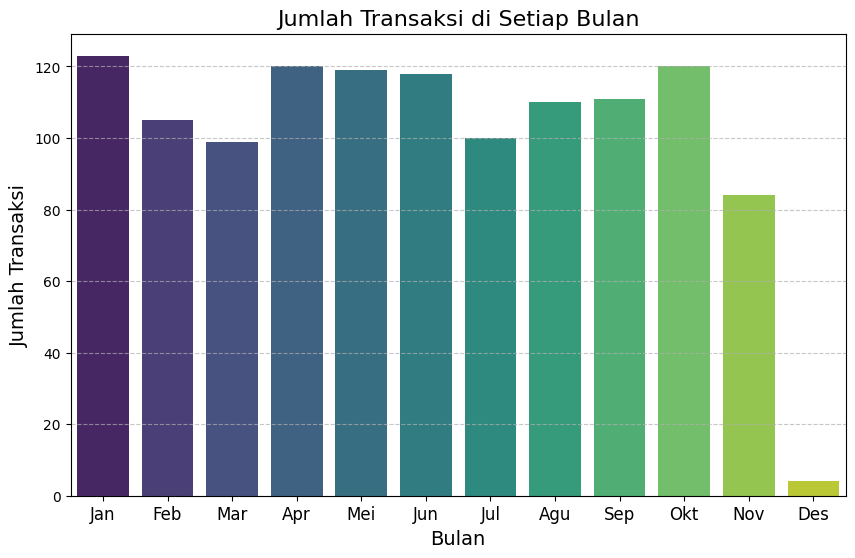

In [114]:
# Mengelompokkan data berdasarkan 'Bulan Transaksi' dan menghitung jumlah transaksi
transaksi_bulanan = df_cleaned.groupby('Bulan Transaksi').size()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=transaksi_bulanan.index, y=transaksi_bulanan.values, palette="viridis")
plt.title("Jumlah Transaksi di Setiap Bulan", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Transaksi", fontsize=14)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

MODELLING

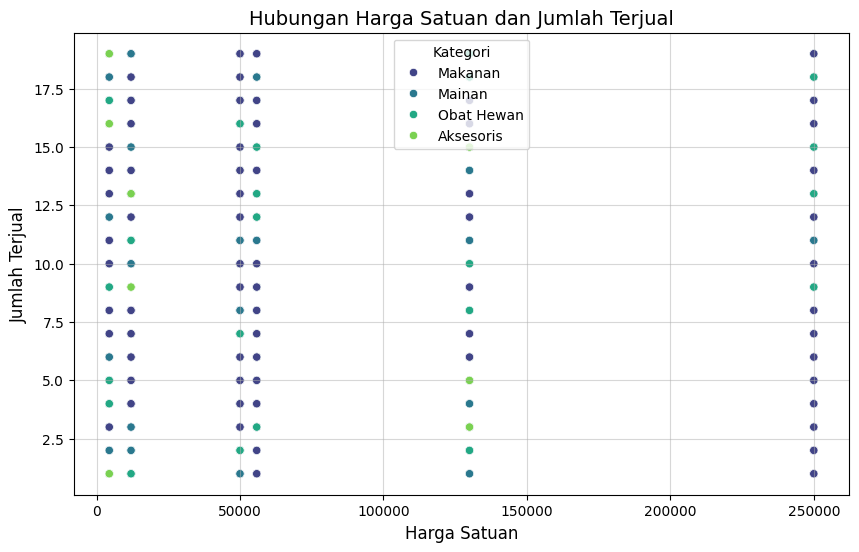

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Harga Satuan', y='Jumlah Terjual', hue='Kategori', palette='viridis')
plt.title('Hubungan Harga Satuan dan Jumlah Terjual', fontsize=14)
plt.xlabel('Harga Satuan', fontsize=12)
plt.ylabel('Jumlah Terjual', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


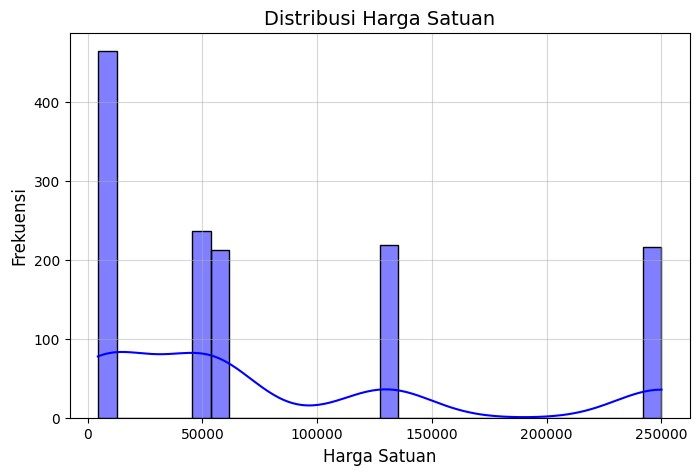

In [106]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Harga Satuan'], bins=30, kde=True, color='blue')
plt.title('Distribusi Harga Satuan', fontsize=14)
plt.xlabel('Harga Satuan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18544\1921592990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sold_per_category.index, y=avg_sold_per_category.values, palette='coolwarm')


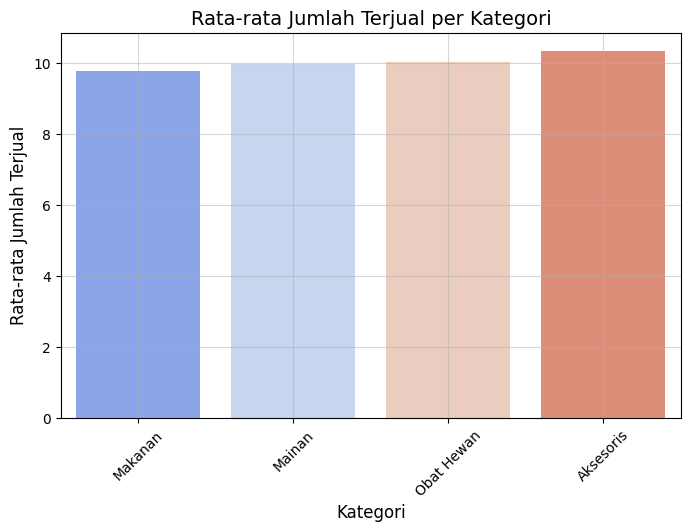

In [107]:
avg_sold_per_category = df.groupby('Kategori')['Jumlah Terjual'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sold_per_category.index, y=avg_sold_per_category.values, palette='coolwarm')
plt.title('Rata-rata Jumlah Terjual per Kategori', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Rata-rata Jumlah Terjual', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()
